<a href="https://colab.research.google.com/github/JuheonChu/Comp491-Transformers-TechSpike/blob/main/TensorFlow_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.9.2


https://www.tensorflow.org/datasets/catalog/cifar10 DataSet


In [47]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


(50000, 32, 32, 3)


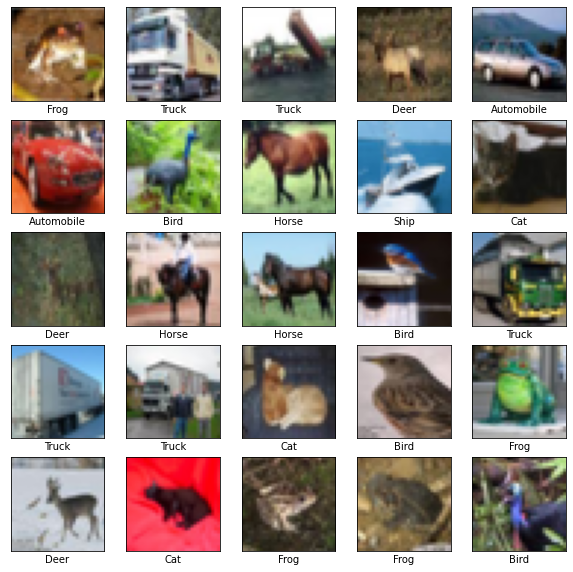

In [48]:
# scale to range of 0 to 1
print(train_images.shape)
train_images = np.divide(train_images, [255.0, 255.0, 255.0]) 
test_images = np.divide(test_images, [255.0, 255.0, 255.0])
#print(train_images)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

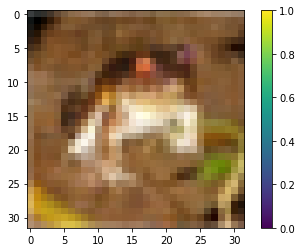

In [49]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10)
])

In [51]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model.fit(train_images,train_labels, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9166 - accuracy: 0.3119
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7740 - accuracy: 0.3642
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7131 - accuracy: 0.3877
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6806 - accuracy: 0.4003
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6535 - accuracy: 0.4141
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6378 - accuracy: 0.4187
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6189 - accuracy: 0.4256
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6046 - accuracy: 0.4284
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5966 - accuracy: 0.4322
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step -

In [53]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.6234 - accuracy: 0.4144 - 929ms/epoch - 3ms/step

Test accuracy: 0.41440001130104065


In [58]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


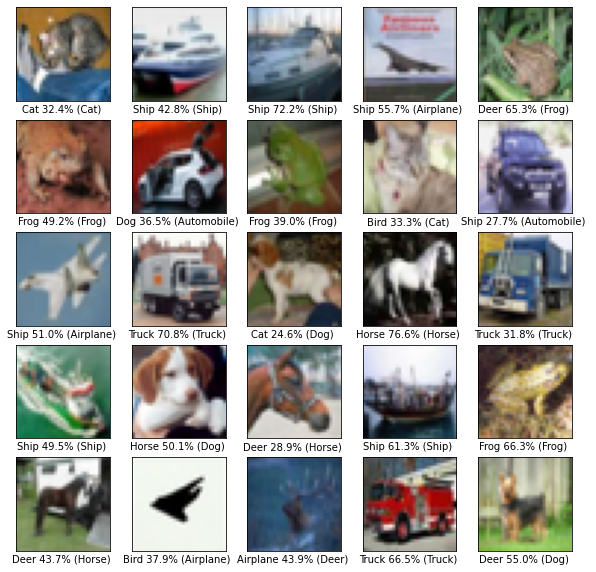

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    guessedClass = np.argmax(predictions[i])
    percentage = str(predictions[i][guessedClass] * 100)[:4] + "%"
    plt.xlabel(class_names[guessedClass] + " " + percentage + " (" +class_names[test_labels[i][0]] + ") ")

plt.show()

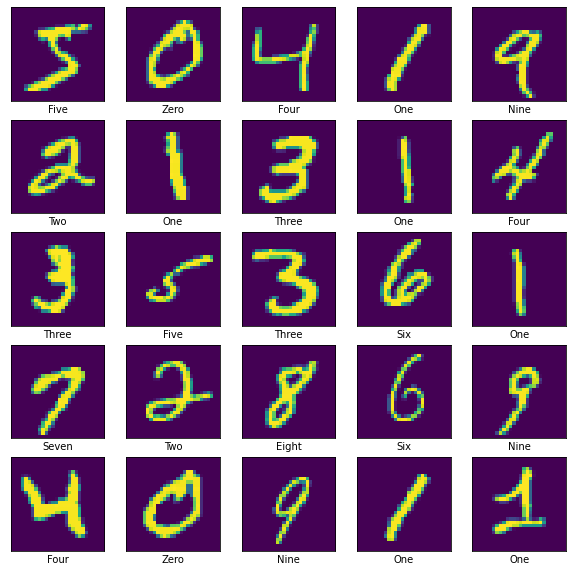

In [65]:
mnist = tf.keras.datasets.mnist
(train_imagesMNIST, train_labelsMNIST), (test_imagesMNIST, test_labelsMNIST) = mnist.load_data()
class_namesMNIST = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

train_imagesMNIST = np.divide(train_imagesMNIST, 255.0) 
test_imagesMNIST = np.divide(test_imagesMNIST, 255.0)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imagesMNIST[i])
    plt.xlabel(class_namesMNIST[train_labelsMNIST[i]])
plt.show()

In [66]:
modelMNIST = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10)
])

In [67]:
modelMNIST.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
modelMNIST.fit(train_imagesMNIST,train_labelsMNIST, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2662 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1156 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0797 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0597 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0471 - accuracy: 0.9851


In [70]:
test_lossMNIST, test_accMNIST = modelMNIST.evaluate(test_imagesMNIST,  test_labelsMNIST, verbose=2)

print('\nTest accuracy:', test_accMNIST)

313/313 - 1s - loss: 0.0782 - accuracy: 0.9761 - 907ms/epoch - 3ms/step

Test accuracy: 0.9761000275611877


In [71]:
probability_modelMNIST = tf.keras.Sequential([modelMNIST, 
                                         tf.keras.layers.Softmax()])
predictionsMNIST = probability_modelMNIST.predict(test_imagesMNIST)

313/313 [==============================] - 1s 2ms/step


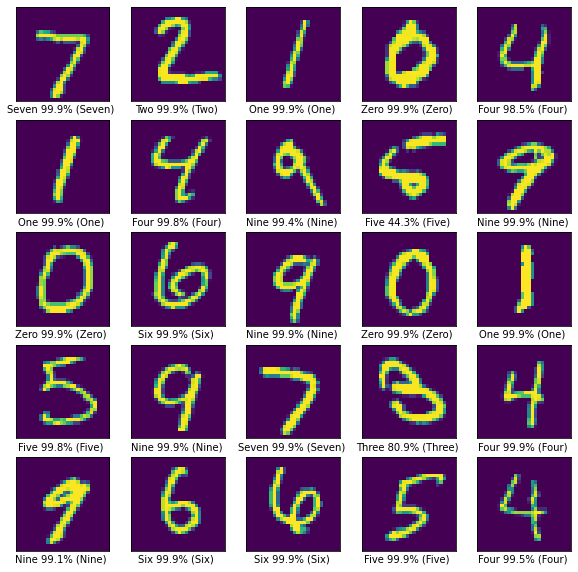

In [73]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_imagesMNIST[i])
    guessedClass = np.argmax(predictionsMNIST[i])
    percentage = str(predictionsMNIST[i][guessedClass] * 100)[:4] + "%"
    plt.xlabel(class_namesMNIST[guessedClass] + " " + percentage + " (" +class_namesMNIST[test_labelsMNIST[i]] + ") ")

plt.show()